# Data Visualization

## Where the data at?

In [1]:
## Where the data at?
input_path = '../Data/Processed_Data/Cell_Deconvolution/'
output_path = '../Data/Processed_Data/Cell_Deconvolution/'

## Which score is this?

In [2]:
score_name = 'ARIC_mC_score'

## Import Libraries

In [3]:
import pandas as pd
import seaborn as sns

# Set theme
sns.set_theme(style='white')

# Import Plotting Functions
from FM_Functions.Data_Visualization import *

## Load Datasets

In [4]:
import pandas as pd

y_train = pd.read_csv(input_path+'y_plus_cibersortx_ARICresults_'+ score_name +'.csv', index_col=0)
y_test = pd.read_csv(input_path+'y_plus_cibersortx_ARICresults_'+ score_name +'_test.csv', index_col=0)

In [17]:
y_train['NK Cell Presence'] = pd.cut(x=y_train['NK'],
                                            bins=[-np.inf, 0.001, np.inf],
                                            labels=['NK Cells -', 'NK Cells +'])

y_test['NK Cell Presence'] = pd.cut(x=y_test['NK'],
                                    bins=[-np.inf, 0.001, np.inf],
                                    labels=['NK Cells -', 'NK Cells +'])

In [21]:
y_test['NK Cells Activated'].describe()

KeyError: 'NK Cells Activated'

In [16]:
y_train['NK'].describe()

count    1078.000000
mean        0.051793
std         0.029821
min         0.000000
25%         0.032042
50%         0.046340
75%         0.065036
max         0.287167
Name: NK, dtype: float64

In [13]:
y_train['NK Cell Presence'].value_counts(dropna=False)

NK Cells +    1072
NK Cells -       6
Name: NK Cell +, dtype: int64

## Kaplan Meiers

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


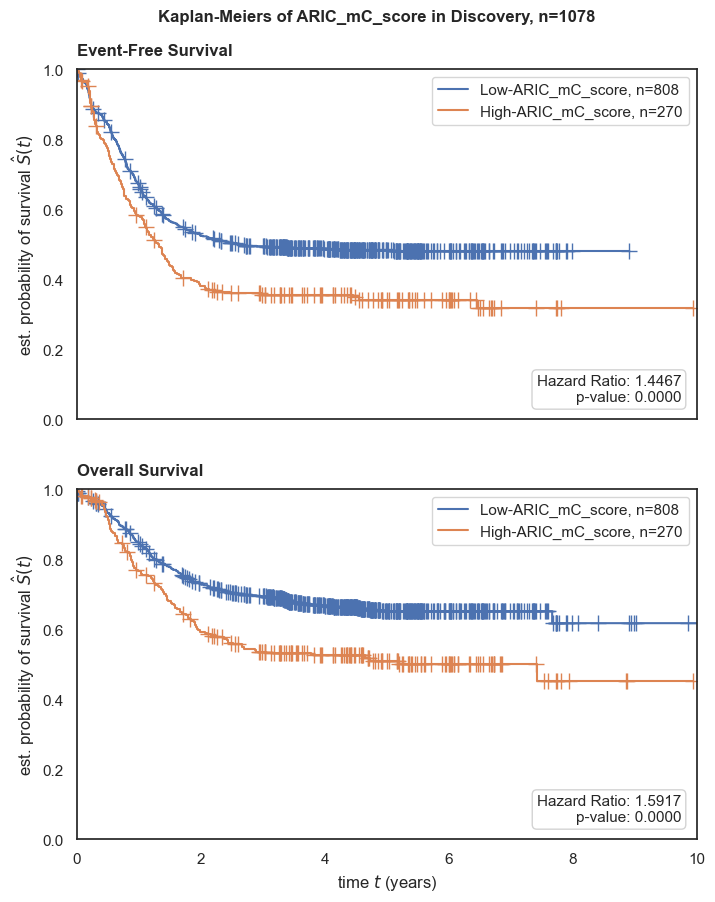

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


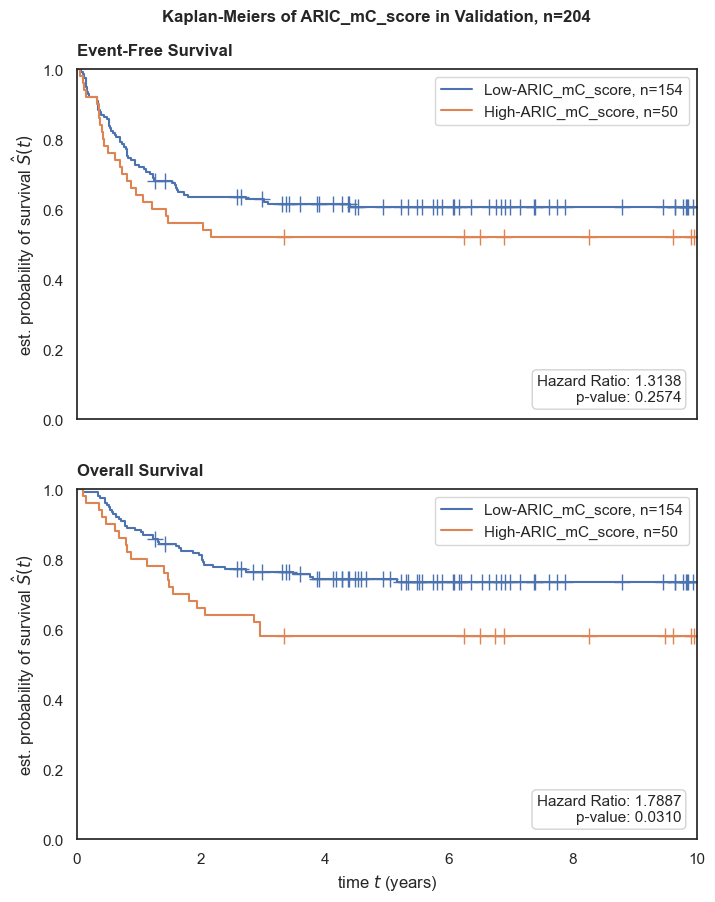

In [22]:
draw_kaplan_meier(scorename=score_name,
                        df=y_train,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='Discovery')

draw_kaplan_meier(scorename=score_name,
                        df=y_test,
                        save_plot=True,
                        add_risk_counts=False,
                        trialname='Validation')


## Forest Plots

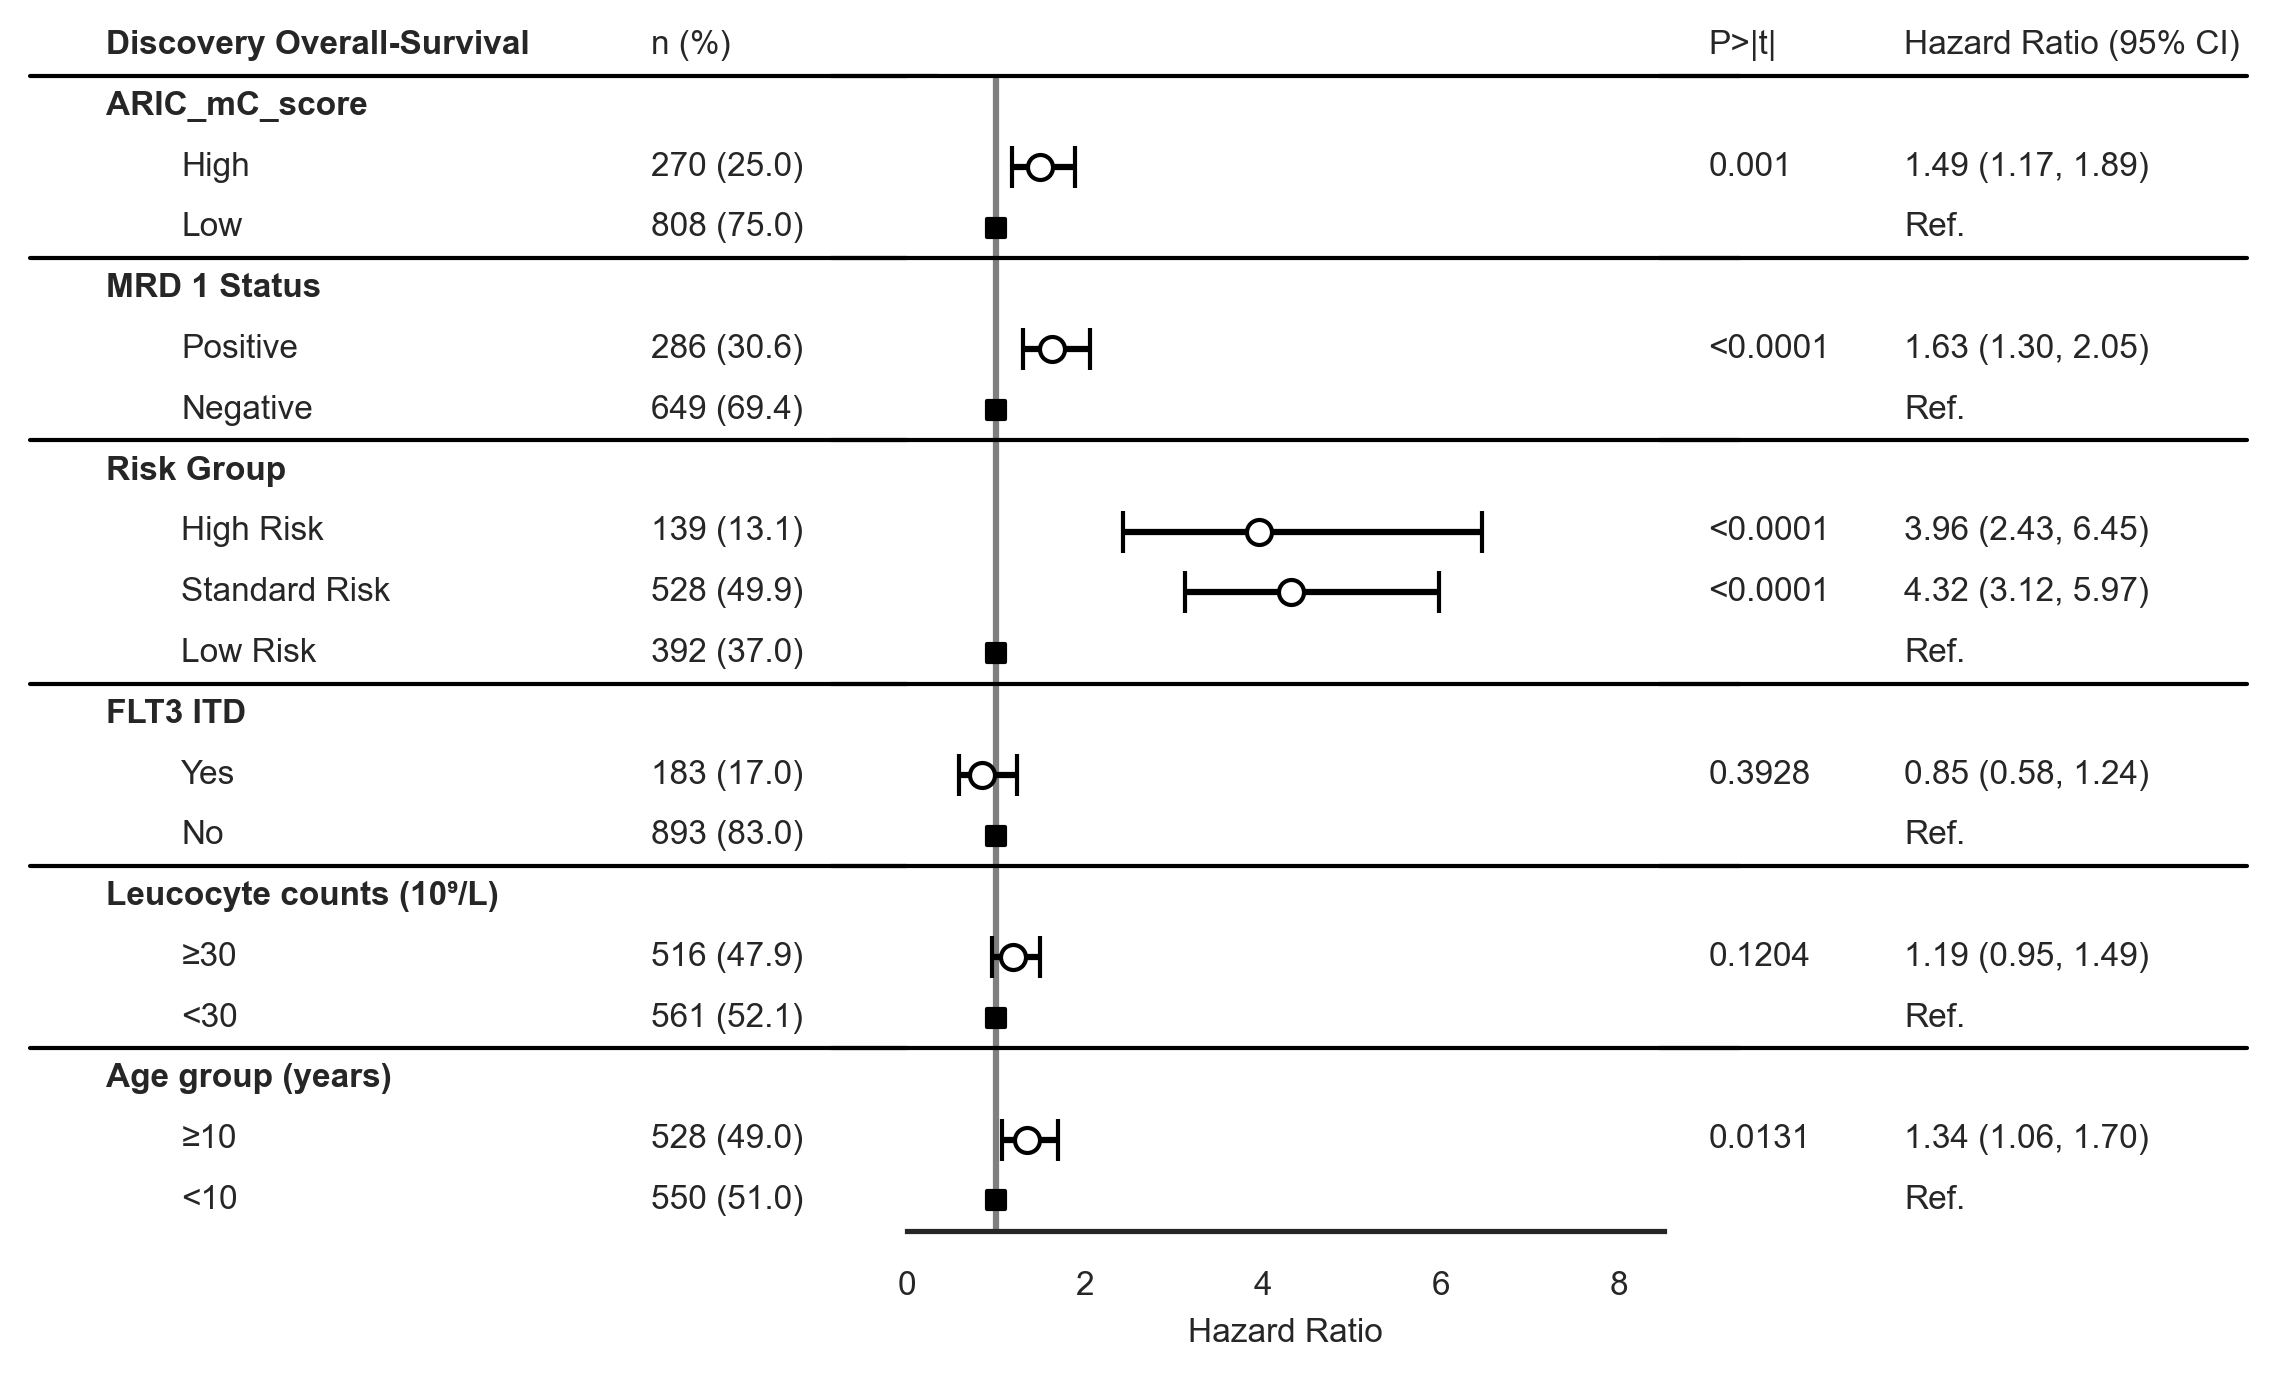

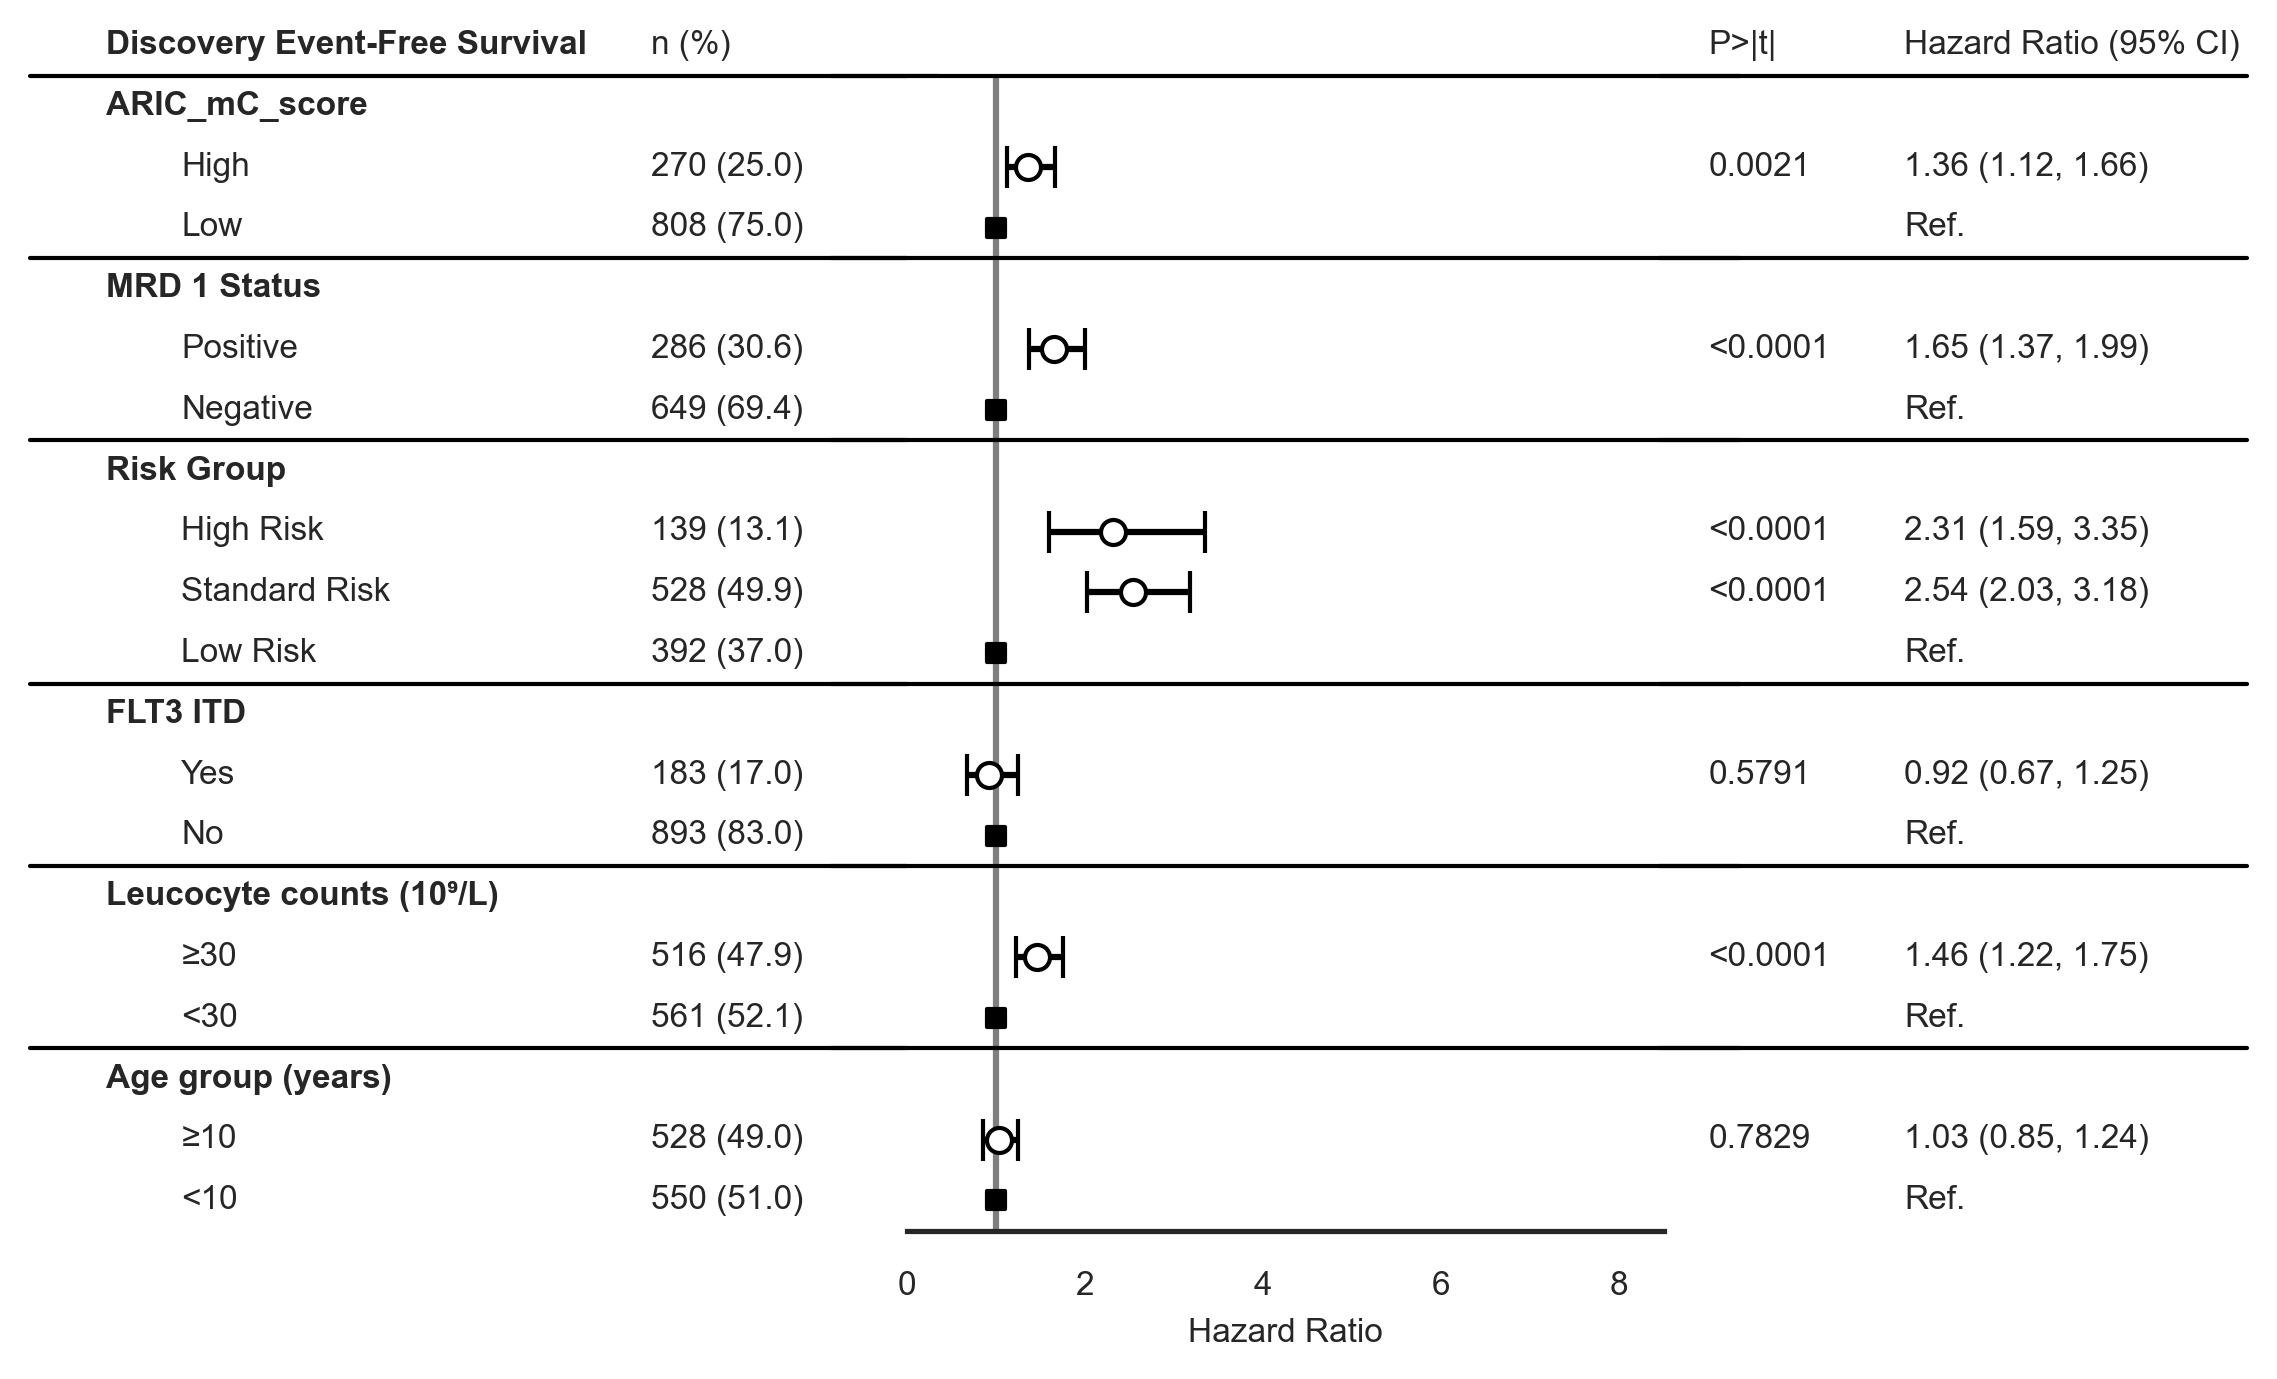

In [6]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=y_train,
                    trialname='Discovery',
                    scorename=score_name,
                    save_plot=False)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=y_train,
                    trialname='Discovery',
                    scorename=score_name,
                    save_plot=False)



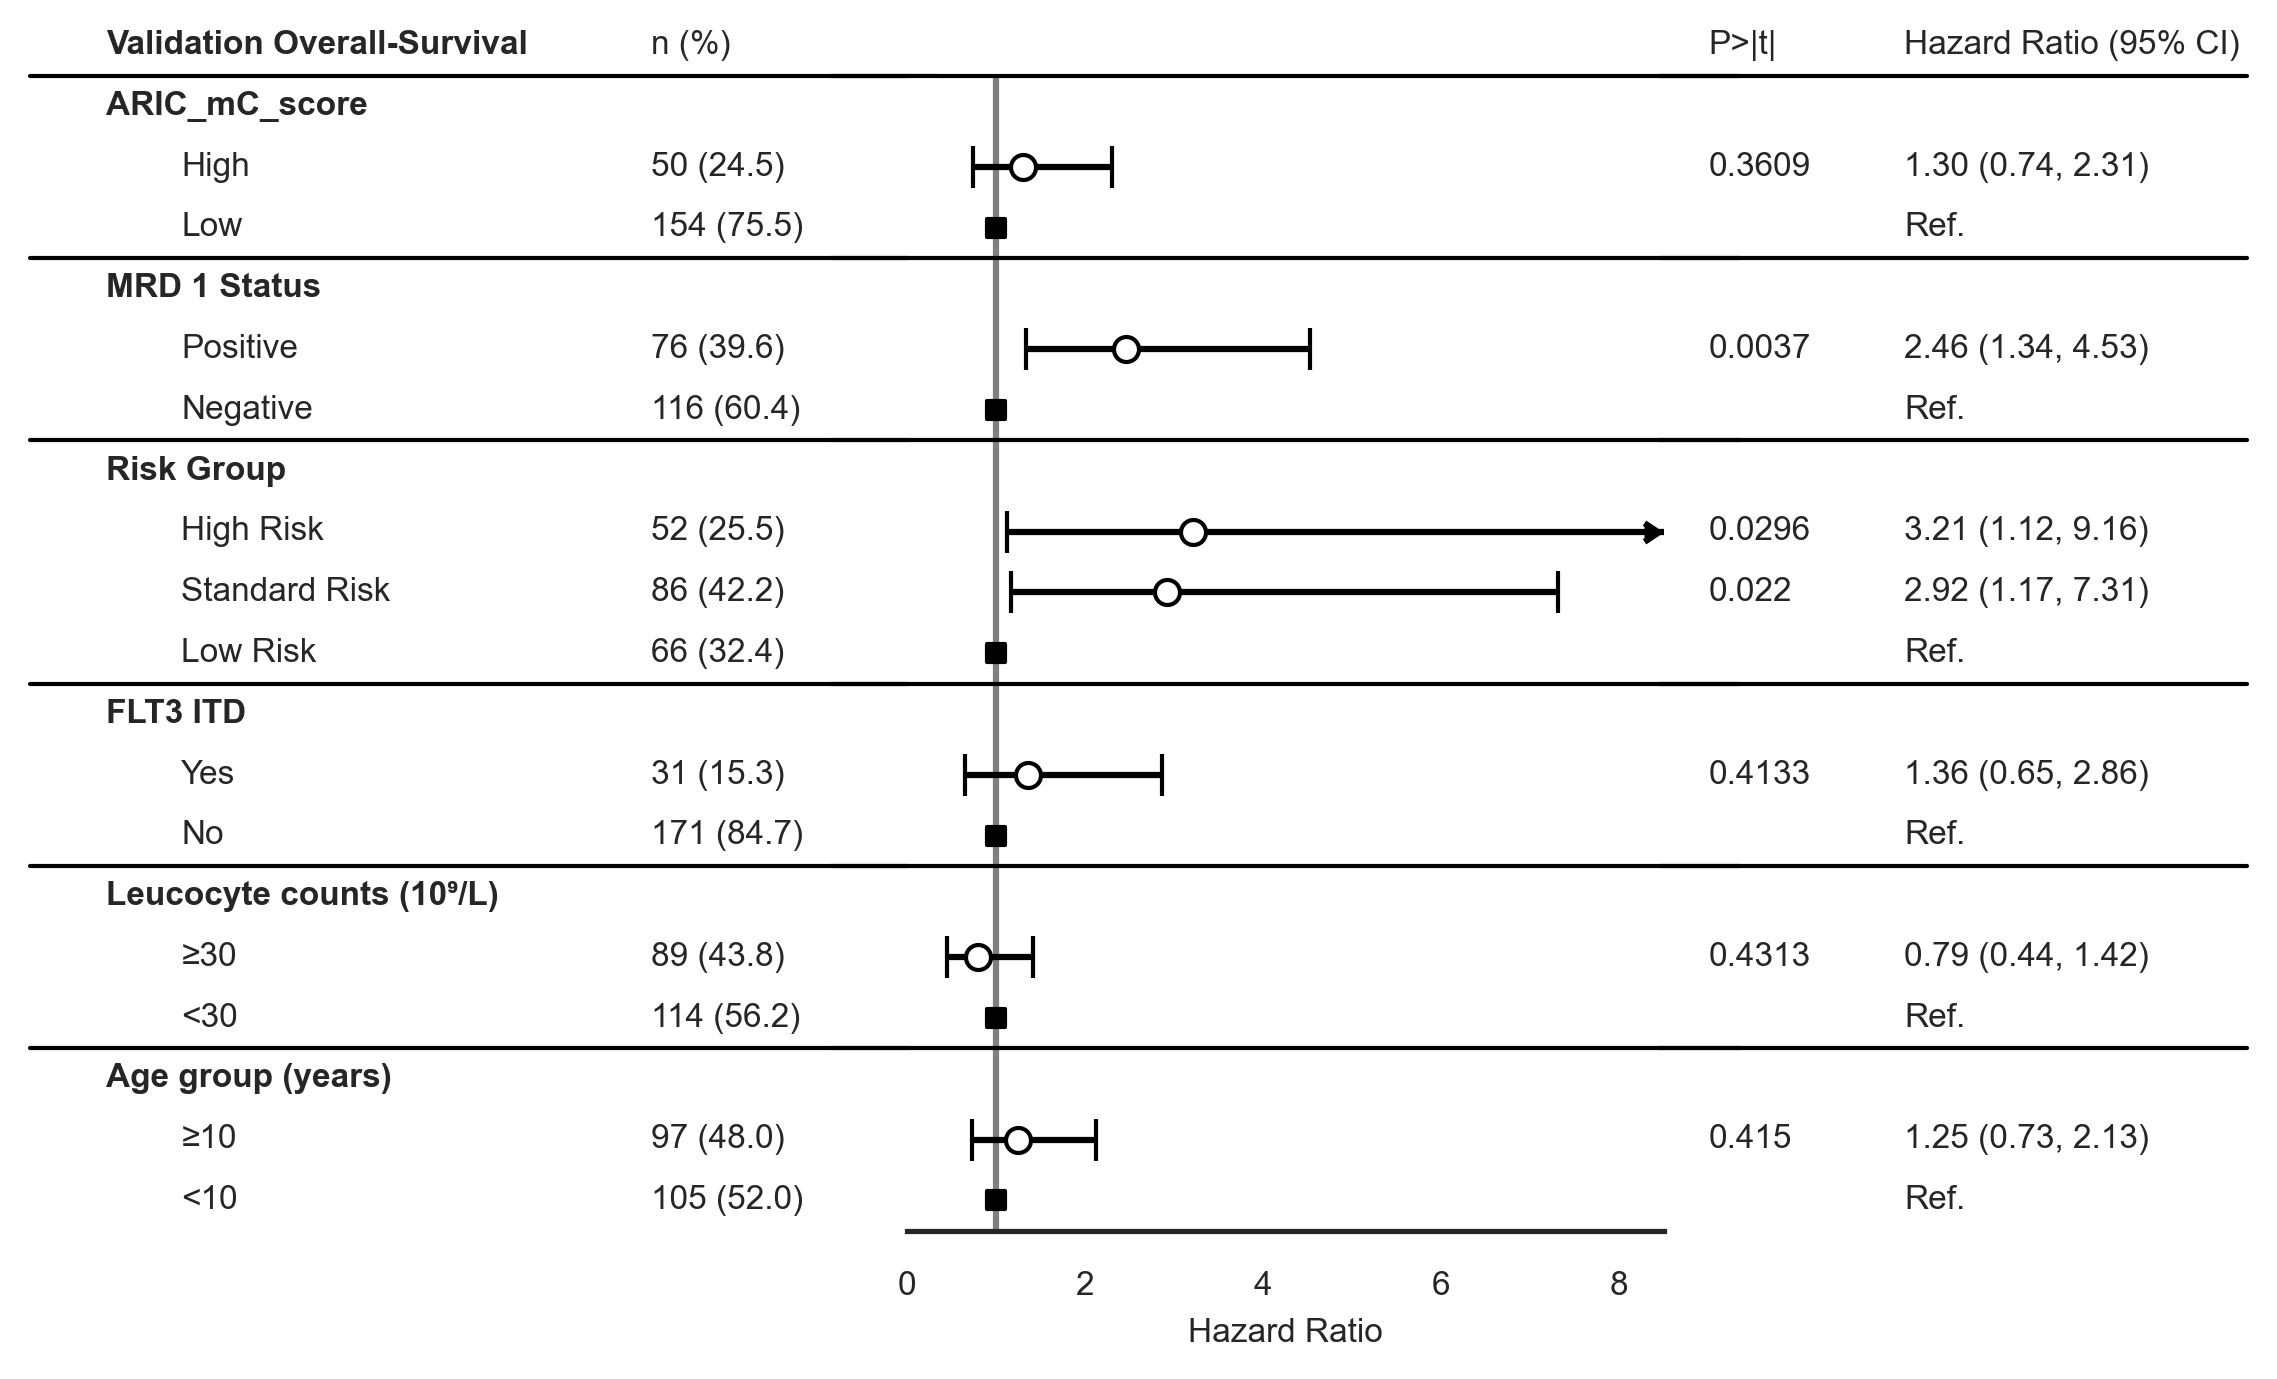

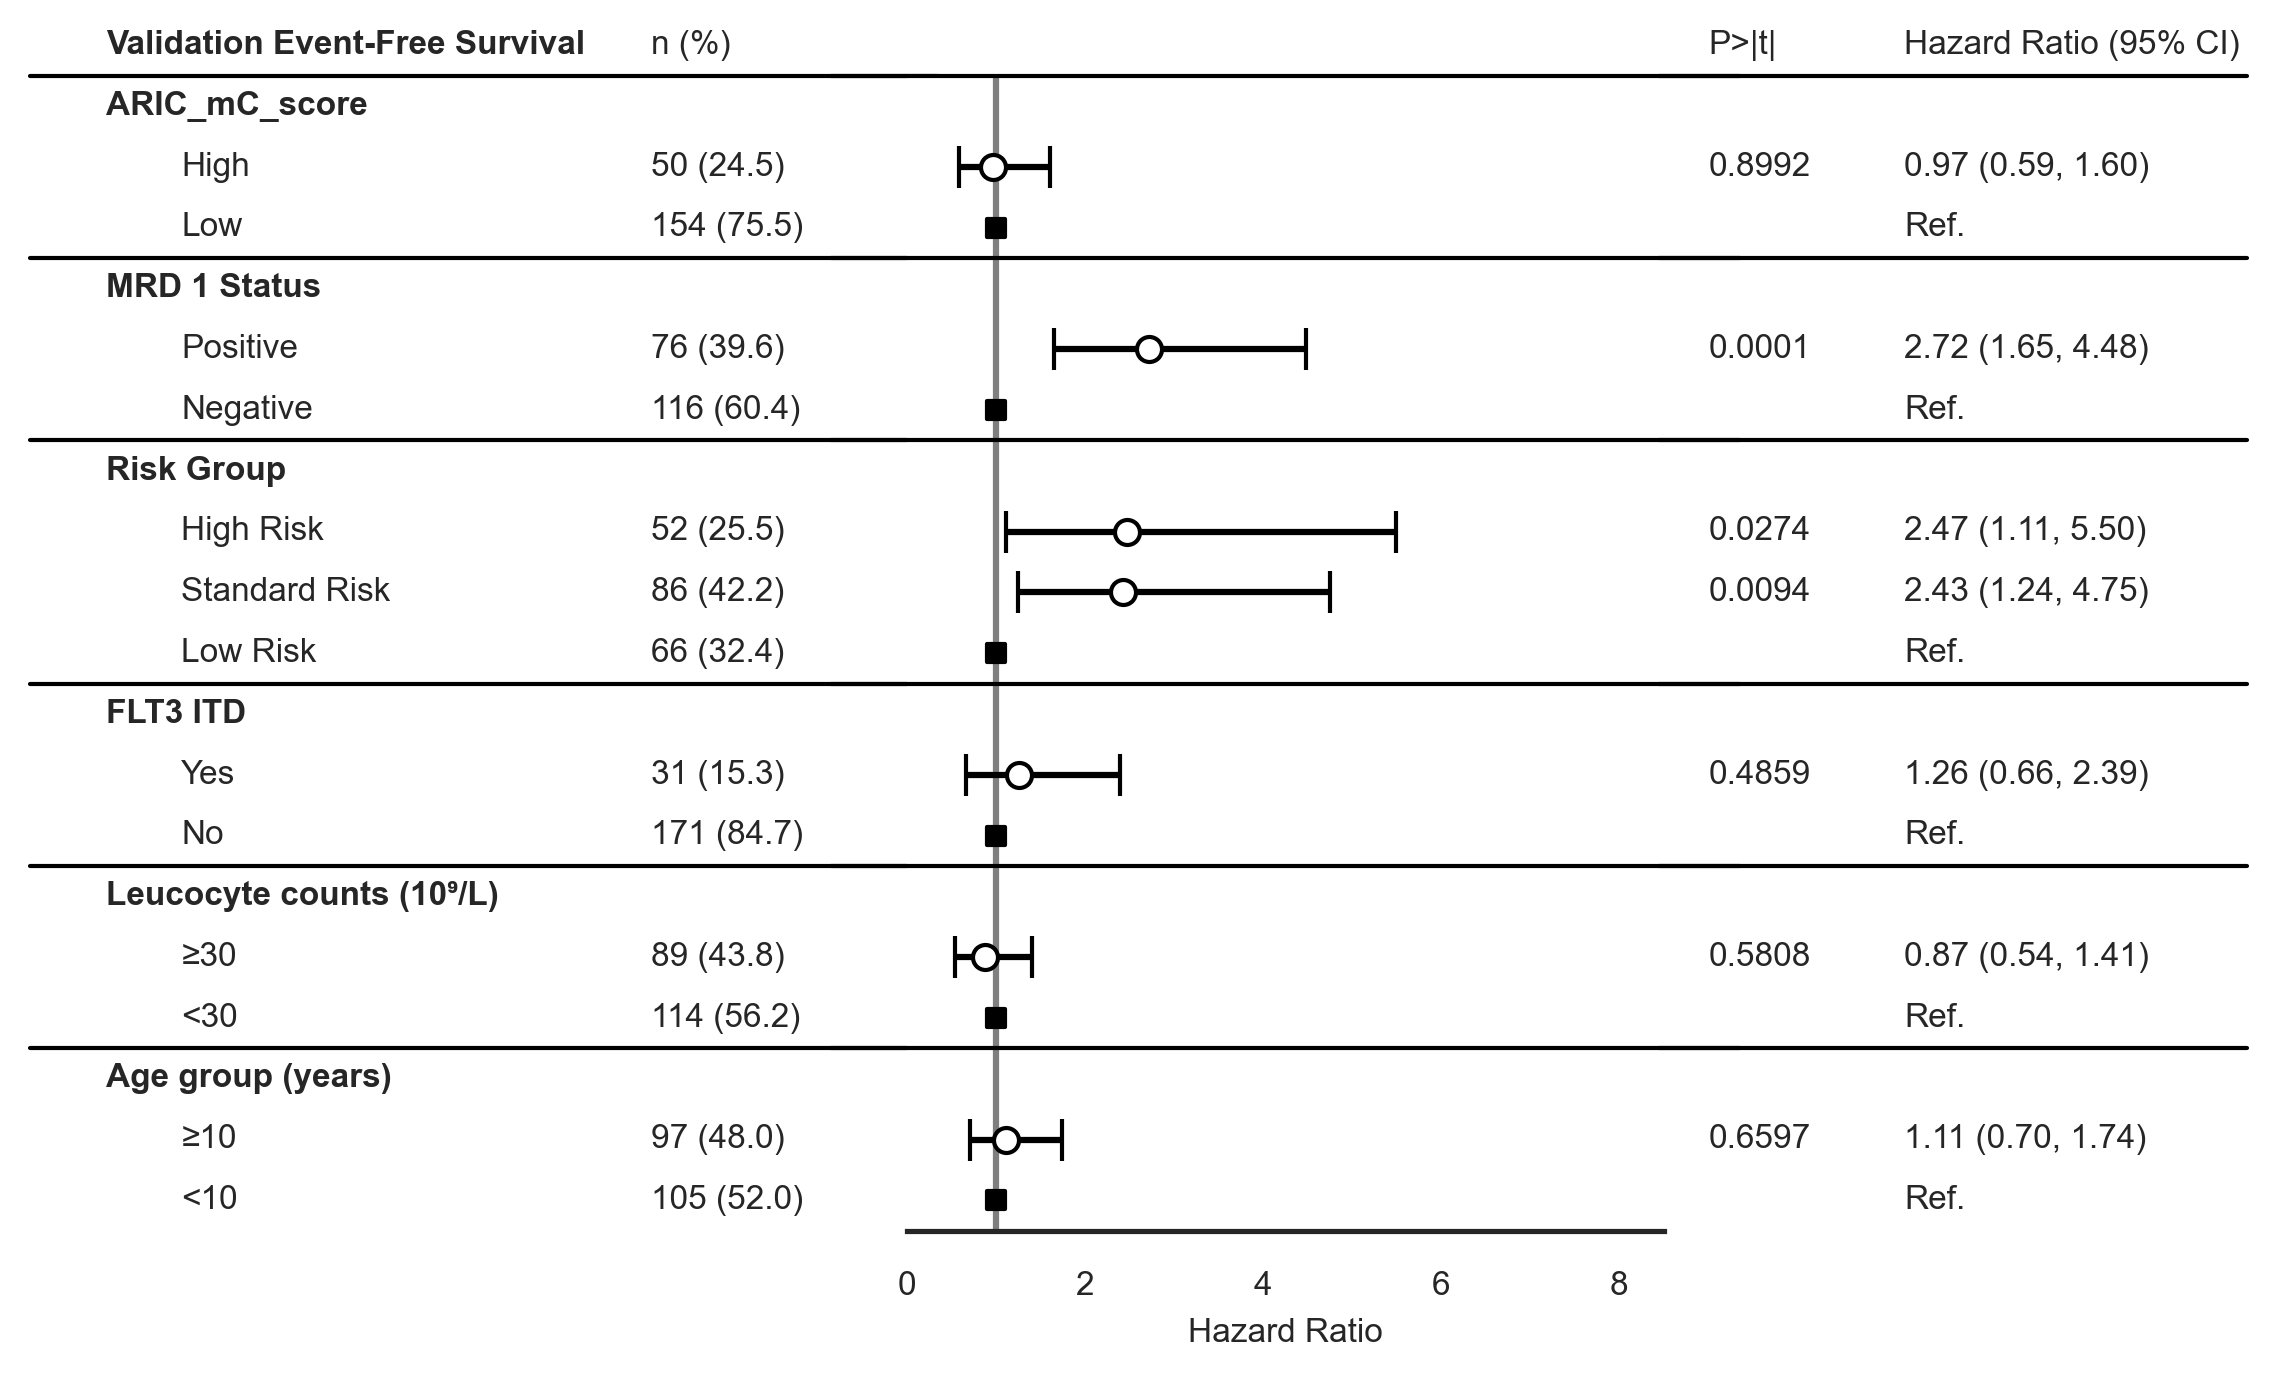

In [7]:
draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=y_test,
                    trialname='Validation',
                    scorename=score_name,
                    save_plot=True)
draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=y_test,
                    trialname='Validation',
                    scorename=score_name,
                    save_plot=True)

## Patient Characteristics Table

In [8]:
from tableone import TableOne

In [9]:
df_all = pd.concat([y_train,y_test], join='outer',keys=['StJude (Discovery)','COG (Validation)']).reset_index(level=0, names='cohort')

In [10]:
columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Vital Status', 'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD']

In [11]:
mytable_all = TableOne(df_all, columns,overall=False,missing=False,pval=False,
                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby='cohort')
mytable_all.tabulate(tablefmt="html", headers=[score_name,"",'COG (Validation)','StJude (Discovery)'])

ARIC_mC_score,,COG (Validation),StJude (Discovery)
n,,204,1078
"Age (years), mean (SD)",,8.8 (6.0),9.4 (6.4)
"Age group (years), n (%)",≥10,97 (48.0),528 (49.0)
,<10,105 (52.0),550 (51.0)
"Sex, n (%)",Female,86 (42.2),538 (49.9)
,Male,118 (57.8),540 (50.1)
"Race or ethnic group, n (%)",White,143 (70.8),796 (79.5)
,Black or African American,35 (17.3),117 (11.7)
,Asian,1 (0.5),49 (4.9)
,Native Hawaiian or other Pacific Islander,2 (1.0),6 (0.6)


In [12]:
columns2 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

In [13]:
mytable_cog = TableOne(y_test, columns2,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')
mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

ARIC_mC_score,,Missing,High,Low,p-value,Statistical Test
n,,,50,154,,
"Age (years), mean (SD)",,2,10.2 (6.4),8.3 (5.8),0.062,Two Sample T-test
"Age group (years), n (%)",≥10,2,29 (59.2),68 (44.4),0.102,Chi-squared
,<10,,20 (40.8),85 (55.6),,
"Sex, n (%)",Female,0,22 (44.0),64 (41.6),0.889,Chi-squared
,Male,,28 (56.0),90 (58.4),,
"Race or ethnic group, n (%)",White,2,31 (62.0),112 (73.7),0.192,Chi-squared (warning: expected count < 5)
,Black or African American,,11 (22.0),24 (15.8),,
,Asian,,1 (2.0),,,
,Other,,7 (14.0),14 (9.2),,


In [14]:
columns3 = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group','FLT3 ITD',
            'Treatment Arm']

In [15]:
mytable_aml02 = TableOne(y_train, columns3,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby= score_name + ' Categorical')
mytable_aml02.tabulate(tablefmt="html",
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

ARIC_mC_score,,Missing,High,Low,p-value,Statistical Test
n,,,270,808,,
"Age (years), mean (SD)",,0,10.9 (6.1),8.9 (6.4),<0.001,Two Sample T-test
"Age group (years), n (%)",≥10,0,166 (61.5),362 (44.8),<0.001,Chi-squared
,<10,,104 (38.5),446 (55.2),,
"Sex, n (%)",Female,0,137 (50.7),401 (49.6),0.806,Chi-squared
,Male,,133 (49.3),407 (50.4),,
"Race or ethnic group, n (%)",White,77,205 (81.7),591 (78.8),0.120,Chi-squared (warning: expected count < 5)
,Black or African American,,30 (12.0),87 (11.6),,
,Asian,,8 (3.2),41 (5.5),,
,American Indian or Alaska Native,,3 (1.2),2 (0.3),,


## Bar Plots

In [16]:
import numpy as np

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


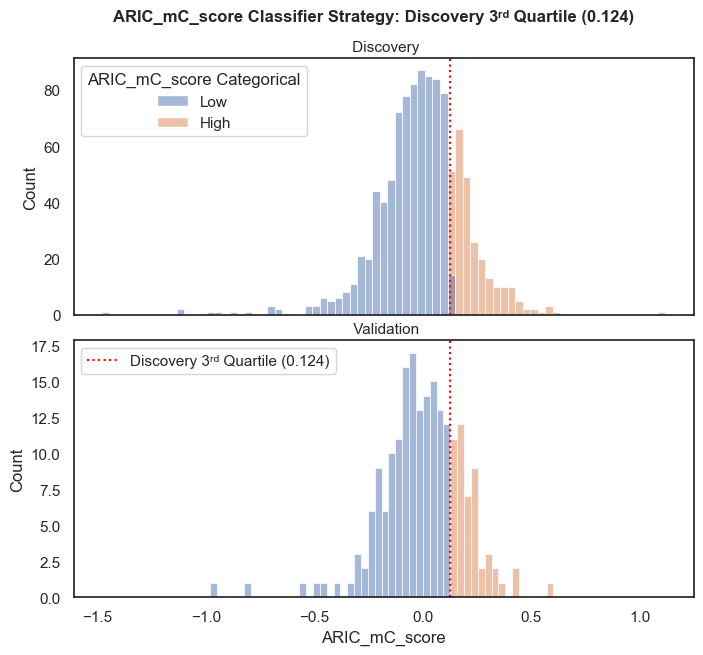

In [21]:
# Set up the matplotlib figure
sns.set_theme(style='white')
f, axs = plt.subplots(2, 1, sharex=True, figsize=(8,7))

# Define plots
sns.histplot(data=y_train,x=score_name, hue=score_name + ' Categorical', ax=axs[0], bins=75)
sns.histplot(data=y_test,x=score_name, hue=score_name + ' Categorical', ax=axs[1], bins=50)

# Set specs
cutoff = np.quantile(y_train[score_name],0.75)

for i in range(2):
    axs[i].axvline(cutoff, linestyle="dotted",color='red', label='Discovery 3ʳᵈ Quartile ('+ round(cutoff,3).astype(str)+ ')')

axs[0].set_title(' Discovery', loc='center', pad=5, fontsize=11)
axs[1].set_title(' Validation', loc='center', pad=5, fontsize=11)

axs[1].legend()
    # Define Plot Specs
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.suptitle(score_name + ' Classifier Strategy: Discovery 3ʳᵈ Quartile ('+ round(cutoff,3).astype(str)+ ')',
                 fontsize='medium', y=0.95,
                 fontweight='bold')
plt.savefig('../Figures/Bar_Plots/'+score_name+'_Classifier_Strategy.png',
                    bbox_inches='tight', dpi=300)

plt.show()

## Box Plots

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  o

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:5.267e-03 Stat=9.789e+00
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=2.191e-04
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.802e-03 Stat=1.095e+01


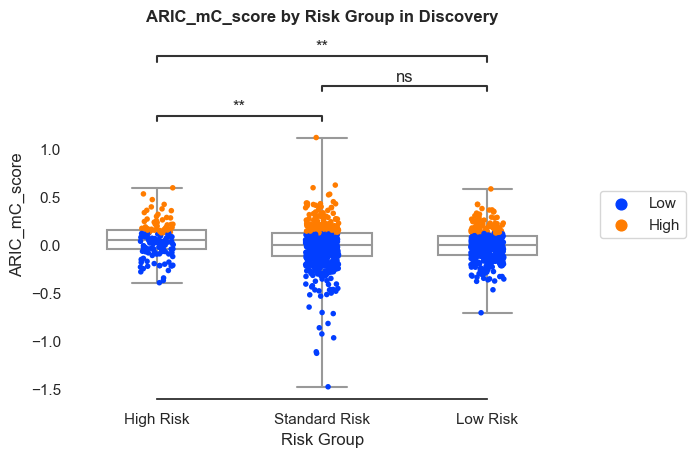

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  o

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=3.518e-01
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.056e-01 Stat=3.318e+00
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.032e-01 Stat=3.337e+00


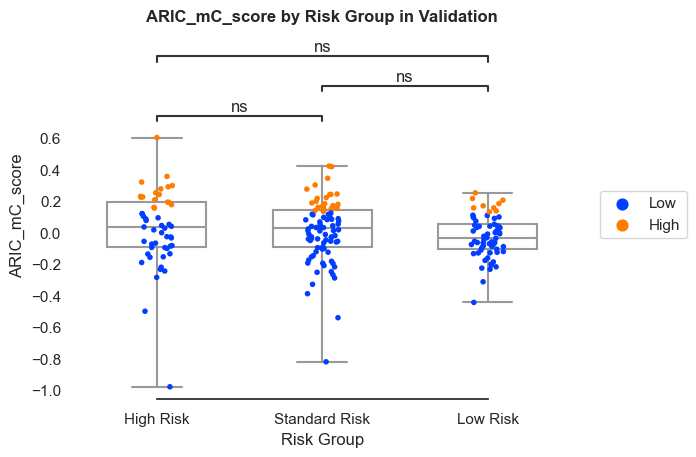

In [24]:
draw_boxplot(df=y_train,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='Discovery', hue=score_name +' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=y_test,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='Validation', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  o

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.449e-02 Stat=5.978e+00


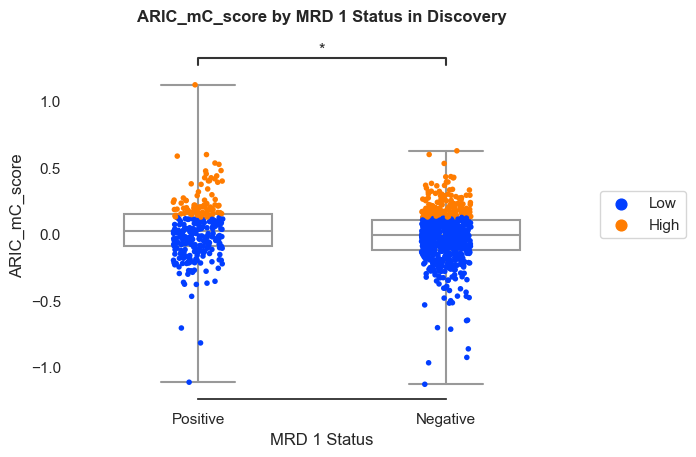

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  o

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:6.231e-03 Stat=7.482e+00


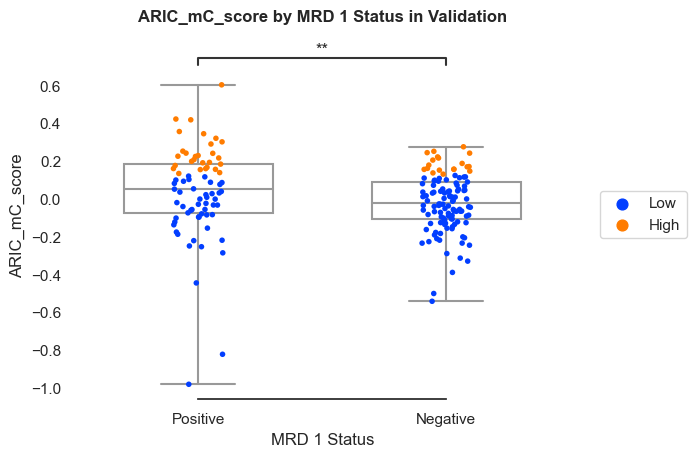

In [25]:
draw_boxplot(df=y_train,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='Discovery', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=y_test,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='Validation', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  o

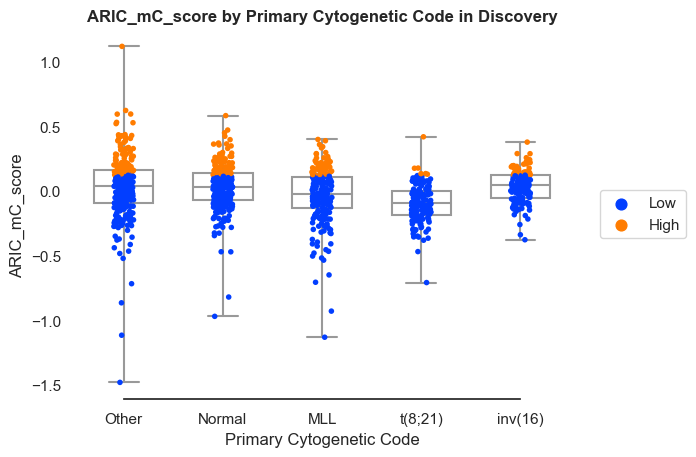

c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
c:\Users\flourenco\Desktop\Methylation_Project\Code\.venv_data_vizualization\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  o

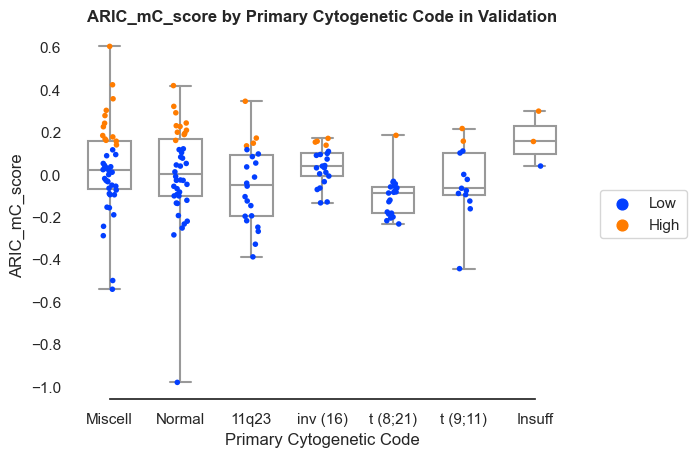

In [26]:
draw_boxplot(df=y_train,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='Discovery', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

draw_boxplot(df=y_test,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='Validation', hue=score_name + ' Categorical',
                save_plot=True, figsize=None)

## End